In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlalchemy
import psycopg2
from sqlalchemy import create_engine, text
import scipy.stats as stats
from scipy.stats import ttest_ind
warnings.filterwarnings('ignore')

In [2]:
#load dataset
db_name = 'vendordatabase'
db_user = 'postgres'
db_password = 'postgres'
db_host = 'localhost'
db_port = '5432'

try:
    conn = psycopg2.connect(
        dbname = 'vendordatabase',
        user = 'postgres',
        password = 'postgres',
        host = 'localhost',
        port = '5432'
    )
    engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')
    print("Connection to postgresql is successful!")
except psycopg2.Error as e:
    print(f"Error connecting postgresql: {e}")


Connection to postgresql is successful!


In [4]:
#fetching data from vendor_sales_summary table
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", engine)
df.head()

vendornumber                vendorname              description  brand  \
0          1128         BROWN-FORMAN CORP  Jack Daniels No 7 Black   1233   
1          4425     MARTIGNETTI COMPANIES    Tito's Handmade Vodka   3405   
2         17035         PERNOD RICARD USA         Absolut 80 Proof   8068   
3          3960  DIAGEO NORTH AMERICA INC   Capt Morgan Spiced Rum   4261   
4          3960  DIAGEO NORTH AMERICA INC          Ketel One Vodka   3545   

   purchaseprice  volume  actual_price  total_purchase_quantity  \
0          26.27  1750.0         36.99                 145080.0   
1          23.19  1750.0         28.99                 164038.0   
2          18.24  1750.0         24.99                 187407.0   
3          16.17  1750.0         22.99                 201682.0   
4          21.89  1750.0         29.99                 138109.0   

   total_purchase_dollars  totalsalesdollars  totalsalesprice  \
0              3811251.60         5101919.51        672819.31   
1              3804041.22         4819073.49        561512.37   
2              3418303.68         4538120.60        461140.15   
3              3261197.94         4475972.88        420050.01   
4              3023206.01         4223107.62        545778.28   

   totalsalesquantity  totalexcisetax  freightcost  grossprofit  profitmargin  \
0            142049.0       260999.20     68601.68   1290667.91     25.297693   
1            160247.0       294438.66    144929.24   1015032.27     21.062810   
2            187140.0       343854.07    123780.22   1119816.92     24.675786   
3            200412.0       368242.80    257032.07   1214774.94     27.139908   
4            135838.0       249587.83    257032.07   1199901.61     28.412764   

   stockturnover  salestopurchaseratio  
0       0.979108              1.338647  
1       0.976890              1.266830  
2       0.998575              1.327594  
3       0.993703              1.372493  
4       0.983556              1.396897

In [7]:
print(df.shape)
print(df.dtypes)

(10692, 18)
vendornumber                 int64
vendorname                  object
description                 object
brand                        int64
purchaseprice              float64
volume                     float64
actual_price               float64
total_purchase_quantity    float64
total_purchase_dollars     float64
totalsalesdollars          float64
totalsalesprice            float64
totalsalesquantity         float64
totalexcisetax             float64
freightcost                float64
grossprofit                float64
profitmargin               float64
stockturnover              float64
salestopurchaseratio       float64
dtype: object


---
# Exploratory Data Analysis
- Our initial phase involved a comprehensive review of the database tables to identify key variables and their interrelationships, guiding our selection for subsequent analysis.
- In this current phase of Exploratory Data Analysis, we will focus on the resultant consolidated table. Our objective is to analyze the distribution of each column to uncover data patterns, detect anomalies, and validate data quality. This meticulous examination is crucial before proceeding with further analytical stages.
---

In [9]:
#summary statistics
df.describe()

vendornumber         brand  purchaseprice        volume  actual_price  \
count   10692.000000  10692.000000   10692.000000  10692.000000  10692.000000   
mean    10650.649458  18039.228769      24.385303    847.360550     35.643671   
std     18753.519148  12662.187074     109.269375    664.309212    148.246016   
min         2.000000     58.000000       0.360000     50.000000      0.490000   
25%      3951.000000   5793.500000       6.840000    750.000000     10.990000   
50%      7153.000000  18761.500000      10.455000    750.000000     15.990000   
75%      9552.000000  25514.250000      19.482500    750.000000     28.990000   
max    201359.000000  90631.000000    5681.810000  20000.000000   7499.990000   

       total_purchase_quantity  total_purchase_dollars  totalsalesdollars  \
count             10692.000000            1.069200e+04       1.069200e+04   
mean               3140.886831            3.010669e+04       4.223907e+04   
std               11095.086769            1.230678e+05       1.676553e+05   
min                   1.000000            7.100000e-01       0.000000e+00   
25%                  36.000000            4.534575e+02       7.292200e+02   
50%                 262.000000            3.655465e+03       5.298045e+03   
75%                1975.750000            2.073825e+04       2.839691e+04   
max              337660.000000            3.811252e+06       5.101920e+06   

       totalsalesprice  totalsalesquantity  totalexcisetax    freightcost  \
count     10692.000000        10692.000000    10692.000000   10692.000000   
mean      18793.783627         3077.482136     1774.226259   61433.763214   
std       44952.773386        10952.851391    10975.582240   60938.458032   
min           0.000000            0.000000        0.000000       0.090000   
25%         289.710000           33.000000        4.800000   14069.870000   
50%        2857.800000          261.000000       46.570000   50293.620000   
75%       16059.562500         1929.250000      418.650000   79528.990000   
max      672819.310000       334939.000000   368242.800000  257032.070000   

        grossprofit  profitmargin  stockturnover  salestopurchaseratio  
count  1.069200e+04  1.069200e+04   10692.000000          10692.000000  
mean   1.213238e+04          -inf       1.706793              2.504390  
std    4.622434e+04           NaN       6.020460              8.459067  
min   -5.200278e+04          -inf       0.000000              0.000000  
25%    5.292000e+01  1.332451e+01       0.807229              1.153729  
50%    1.399640e+03  3.040546e+01       0.981529              1.436894  
75%    8.660200e+03  3.995613e+01       1.039342              1.665449  
max    1.290668e+06  9.971666e+01     274.500000            352.928571

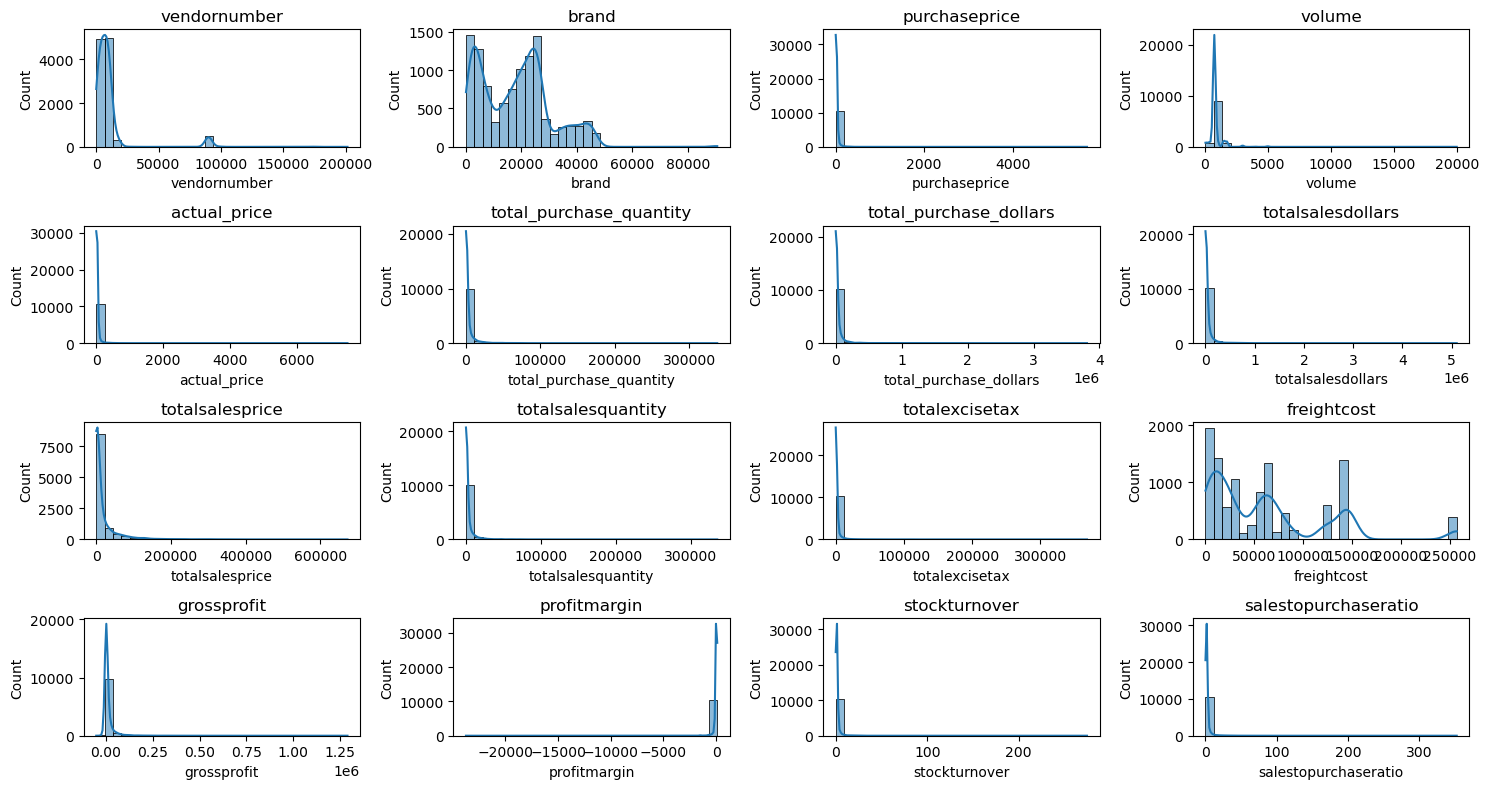

In [11]:
#distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,8))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

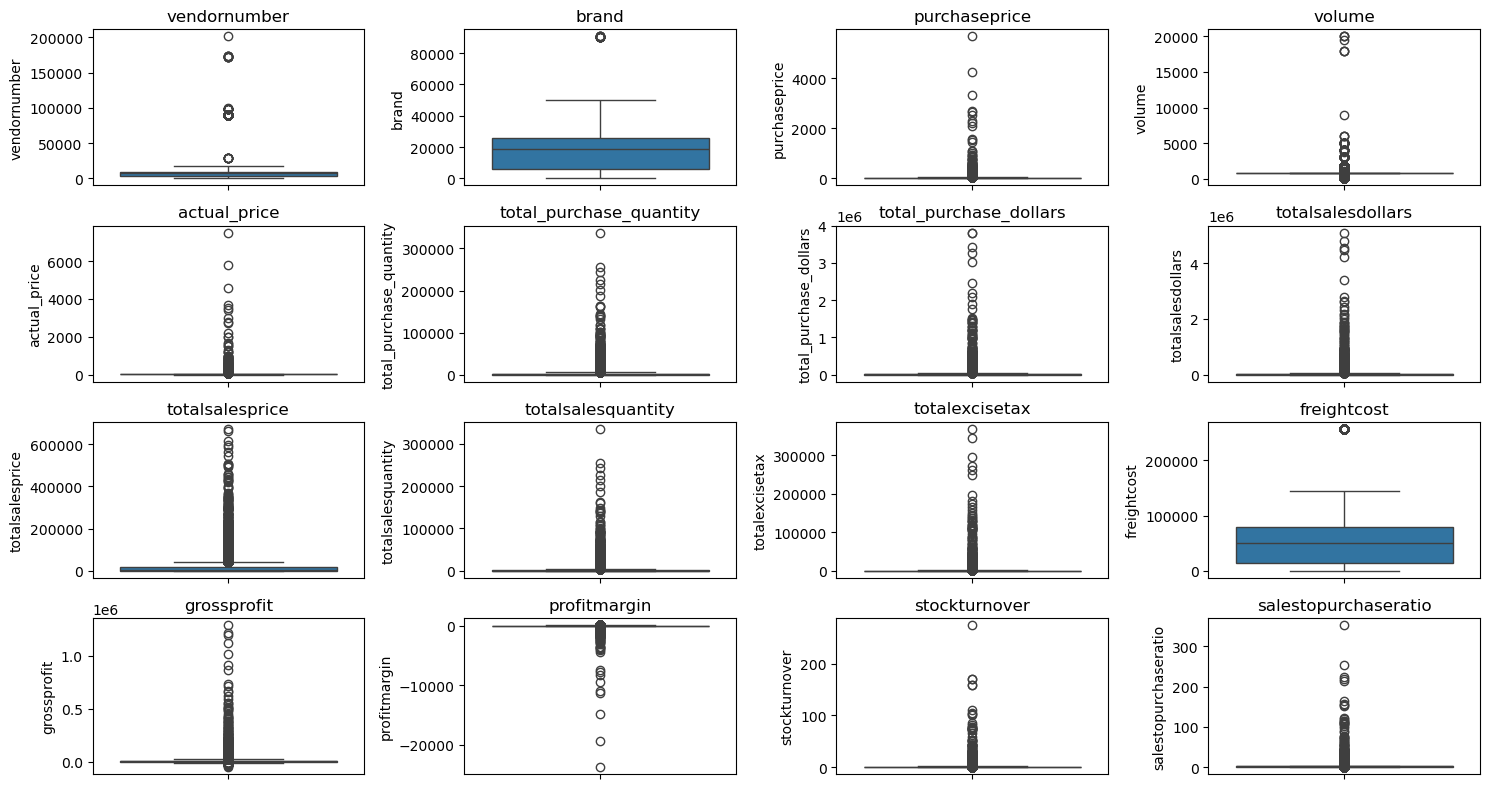

In [12]:
#outlier detection using boxlplot
plt.figure(figsize=(15,8))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [15]:
df.describe().T

count          mean            std       min  \
vendornumber             10692.0  1.065065e+04   18753.519148      2.00   
brand                    10692.0  1.803923e+04   12662.187074     58.00   
purchaseprice            10692.0  2.438530e+01     109.269375      0.36   
volume                   10692.0  8.473605e+02     664.309212     50.00   
actual_price             10692.0  3.564367e+01     148.246016      0.49   
total_purchase_quantity  10692.0  3.140887e+03   11095.086769      1.00   
total_purchase_dollars   10692.0  3.010669e+04  123067.799627      0.71   
totalsalesdollars        10692.0  4.223907e+04  167655.265984      0.00   
totalsalesprice          10692.0  1.879378e+04   44952.773386      0.00   
totalsalesquantity       10692.0  3.077482e+03   10952.851391      0.00   
totalexcisetax           10692.0  1.774226e+03   10975.582240      0.00   
freightcost              10692.0  6.143376e+04   60938.458032      0.09   
grossprofit              10692.0  1.213238e+04   46224.337964 -52002.78   
profitmargin             10692.0          -inf            NaN      -inf   
stockturnover            10692.0  1.706793e+00       6.020460      0.00   
salestopurchaseratio     10692.0  2.504390e+00       8.459067      0.00   

                                  25%           50%           75%  \
vendornumber              3951.000000   7153.000000   9552.000000   
brand                     5793.500000  18761.500000  25514.250000   
purchaseprice                6.840000     10.455000     19.482500   
volume                     750.000000    750.000000    750.000000   
actual_price                10.990000     15.990000     28.990000   
total_purchase_quantity     36.000000    262.000000   1975.750000   
total_purchase_dollars     453.457500   3655.465000  20738.245000   
totalsalesdollars          729.220000   5298.045000  28396.915000   
totalsalesprice            289.710000   2857.800000  16059.562500   
totalsalesquantity          33.000000    261.000000   1929.250000   
totalexcisetax               4.800000     46.570000    418.650000   
freightcost              14069.870000  50293.620000  79528.990000   
grossprofit                 52.920000   1399.640000   8660.200000   
profitmargin                13.324515     30.405457     39.956135   
stockturnover                0.807229      0.981529      1.039342   
salestopurchaseratio         1.153729      1.436894      1.665449   

                                  max  
vendornumber             2.013590e+05  
brand                    9.063100e+04  
purchaseprice            5.681810e+03  
volume                   2.000000e+04  
actual_price             7.499990e+03  
total_purchase_quantity  3.376600e+05  
total_purchase_dollars   3.811252e+06  
totalsalesdollars        5.101920e+06  
totalsalesprice          6.728193e+05  
totalsalesquantity       3.349390e+05  
totalexcisetax           3.682428e+05  
freightcost              2.570321e+05  
grossprofit              1.290668e+06  
profitmargin             9.971666e+01  
stockturnover            2.745000e+02  
salestopurchaseratio     3.529286e+02

Based on the descriptive statistics table you provided, here are some key insights for each column:

* `*`vendornumb`r`**: With a count of $10692$, the `vendornumber` has a wide range ($1$ to $201359$) and a high standard deviation ($191482$), suggesting a diverse set of vendors. The mean ($106506$) is significantly higher than the median ($3951$), indicating a right-skewed distribution, where there are a few vendors with very high IDs. The $75^{th}$ percentile ($9552$) is much closer to the median, reinforcing the presence of larger vendor IDs pulling the mean up.

* **`brand`**: Similar to `vendornumber`, the `brand` column ($10692$ entries) also exhibits a wide range ($58$ to $90631$) and a high standard deviation ($12662$), pointing to a large variety of brands. The mean ($18039$) is higher than the median ($5793.5$), suggesting a right-skewed distribution, possibly due to a few brands with very high IDs.

* **`purchaseprice`**: The `purchaseprice` (count $10692$) has a mean of $24.38$ and a relatively high standard deviation of $109.27$, indicating significant variability in purchase prices. The minimum price is $0.36$, while the maximum is $5681.81$. The median is $10.45$, which is considerably lower than the mean, suggesting a right-skewed distribution with some very high purchase prices pulling up the average. The $75^{th}$ percentile is $19.48$, further emphasizing this skewness.

* **`volume`**: The `volume` column ($10692$ entries) shows a mean of $847.36$ and a standard deviation of $664.31$. The minimum volume is $0$, and the maximum is $20000$. The median is $750$, which is close to the $25^{th}$ percentile ($750$) and the $75^{th}$ percentile ($750$). This suggests that a significant portion of the volumes are clustered around $750$, indicating a common volume value. However, the large maximum value points to some instances of very high volume.

* **`actual_price`**: The `actual_price` (count $10692$) has a mean of $35.64$ and a standard deviation of $148.25$. The prices range from $0.49$ to $7499.99$. The median is $15.99$, which is much lower than the mean, indicating a right-skewed distribution, likely due to a few very high actual prices.

* **`total_purchase_quantity`**: With a count of $10692$, `total_purchase_quantity` has a mean of $3140.89$ and a very high standard deviation of $11095.09$, indicating extreme variability. The values range from $1$ to $337660$. The median is $262$, which is significantly lower than the mean, highlighting a heavily right-skewed distribution with a few instances of extremely large purchase quantities.

* **`total_purchase_dollars`**: The `total_purchase_dollars` (count $10692$) has a mean of $30106.69$ and an extremely high standard deviation of $123067.80$. The range is vast, from $0.71$ to $3811252$. The median is $3655.46$, which is much lower than the mean, indicating a heavily right-skewed distribution with substantial outliers in higher purchase dollar amounts.

* **`totalsalesdollars`**: This column ($10692$ entries) has a mean of $42239.07$ and a very large standard deviation of $167655.27$. The range is from $0.00$ to $5101920$. The median is $5298.05$, which is considerably lower than the mean, suggesting a heavily right-skewed distribution with a few very large sales transactions driving up the average.

* **`totalsalesprice`**: The `totalsalesprice` (count $10692$) has a mean of $18793.78$ and a standard deviation of $44952.77$. The prices range from $0.00$ to $672819.3$. The median is $2857.80$, indicating a substantial right skew, with a few exceptionally high sales prices.

* **`totalsalesquantity`**: With a count of $10692$, `totalsalesquantity` has a mean of $3077.48$ and a standard deviation of $10952.85$. The quantities range from $0.00$ to $334939$. The median is $261$, significantly lower than the mean, pointing to a heavily right-skewed distribution with a few very large sales quantities.

* **`totalexcisetax`**: The `totalexcisetax` (count $10692$) has a mean of $1774.23$ and a high standard deviation of $10975.58$. The tax amounts range from $0.00$ to $368242.8$. The median is $46.57$, which is much lower than the mean, indicating a heavily right-skewed distribution with some very large excise tax values.

* **`freightcost`**: The `freightcost` (count $10692$) has a mean of $61433.76$ and a standard deviation of $60938.46$. The costs range from $0.09$ to $257032.1$. The median is $50293.62$, which is somewhat lower than the mean, suggesting a moderate right-skew in the distribution.

* **`grossprofit`**: The `grossprofit` (count $10692$) has a mean of $12132.38$ and a large standard deviation of $46224.34$. The minimum value is $-52002.78$, indicating instances of losses, while the maximum is $1290668$. The median is $1399.64$, significantly lower than the mean, which suggests a heavily right-skewed distribution with a few very high gross profits pulling the mean up, alongside the presence of losses.

* **`profitmargin`**: This column ($10692$ entries) has a mean that is not meaningful due to the `-inf` minimum value and `NaN` standard deviation, which likely indicates division by zero in the calculation of profit margin. This is a critical data quality issue that needs to be addressed. The maximum profit margin is $9.97$ and the median is $30.41$. The $25^{th}$ percentile is $13.32$ and the $75^{th}$ percentile is $39.96$. This means that for valid `profitmargin` values, the majority of values are positive and reasonably distributed between $13.32$ and $39.96$. The presence of `-inf` needs to be investigated to understand the cause (e.g., zero sales or negative sales).

* **`stockturnover`**: The `stockturnover` (count $10692$) has a mean of $1.71$ and a standard deviation of $6.02$. The values range from $0.00$ to $274.5$. The median is $0.98$, indicating that half of the stock turnovers are less than or equal to $0.98$. The mean being higher than the median and the large maximum value suggest a right-skewed distribution with some exceptionally high stock turnovers.

* **`salestopurchaseratio`**: The `salestopurchaseratio` (count $10692$) has a mean of $2.50$ and a standard deviation of $8.46$. The values range from $0.00$ to $352.93$. The median is $1.44$, which is lower than the mean, indicating a right-skewed distribution with some instances of very high sales to purchase ratios.

In summary, many of the monetary and quantity-related columns (`purchaseprice`, `actual_price`, `total_purchase_quantity`, `total_purchase_dollars`, `totalsalesdollars`, `totalsalesprice`, `totalsalesquantity`, `totalexcisetax`, `grossprofit`) exhibit strong right-skewness, with means significantly higher than medians and large standard deviations. This suggests the presence of outliers or a few very large transactions that significantly influence the average. The `profitmargin` column has a data quality issue due to the `-inf` value, requiring further investigation. The `volume` column shows a clustering around $750$, indicating a common volume size. Overall, the data suggests a wide range of values and a need for further investigation into the distribution of the skewed variables and the cause of the `profitmargin` issue.

The provided descriptive statistics strongly suggest the presence of **outliers** in many of the columns, particularly those related to monetary values and quantities. Outliers are data points that significantly differ from other observations, often indicating variability in measurement, experimental errors, or simply novel occurrences.

Here's a breakdown of how the statistics hint at outliers and for which columns:

**Key Indicators of Outliers from Descriptive Statistics:**

1.  **Large Difference between Mean and Median (50th Percentile):** When the mean is significantly larger than the median, it typically indicates a **right-skewed distribution**, often caused by a few extremely high values pulling the mean upwards.
2.  **High Standard Deviation Relative to the Mean:** A very large standard deviation suggests a wide spread of data, which can be due to extreme values.
3.  **Extreme Minimum or Maximum Values Compared to Quartiles:** If the `max` value is many times larger than the `75%` quartile, or if the `min` value is many times smaller than the `25%` quartile, it strongly suggests outliers.
4.  **Negative or Infinite Values in Positively-Constrained Metrics:** For metrics that should typically be positive (like price, quantity, profit margin), negative or infinite values clearly indicate anomalies.

**Columns Highly Suggestive of Outliers:**

* **`vendornumber` and `brand`:**
    * **Insight:** Both show a significant difference between their mean and median (e.g., `vendornumber` mean $106506$ vs. median $3951$; `brand` mean $18039$ vs. median $5793.5$). The max values ($201359$ and $90631$) are much higher than their respective $75^{th}$ percentiles ($9552$ and $25514$).
    * **Outlier Indication:** There are likely a few very high vendor and brand IDs that are statistical outliers.

* **`purchaseprice`, `actual_price`:**
    * **Insight:** Mean is significantly higher than the median (e.g., `purchaseprice` mean $24.38$ vs. median $10.45$; `actual_price` mean $35.64$ vs. median $15.99$). The max values are also disproportionately large ($5681.81$ and $7499.99$) compared to their $75^{th}$ percentiles ($19.48$ and $28.99$).
    * **Outlier Indication:** A few very expensive purchases or items could be driving these averages up.

* **`volume`:**
    * **Insight:** While the median is $750$ and the $75^{th}$ percentile is also $750$, indicating a strong cluster, the maximum volume is $20000$.
    * **Outlier Indication:** There are instances of extremely high volume that stand out from the typical transactions.

* **`total_purchase_quantity`, `total_purchase_dollars`, `totalsalesdollars`, `totalsalesprice`, `totalsalesquantity`, `totalexcisetax`:**
    * **Insight:** These columns exhibit the most pronounced signs of outliers. Their standard deviations are extremely high relative to their means, and their maximum values are orders of magnitude larger than their medians and $75^{th}$ percentiles.
        * `total_purchase_dollars`: mean $30106$ vs. median $3655$; max $3.8M$ vs. $75^{th}$ percentile $20738$.
        * `totalsalesdollars`: mean $42239$ vs. median $5298$; max $5.1M$ vs. $75^{th}$ percentile $28396$.
        * Similar patterns are seen across all these total quantity/dollar metrics.
    * **Outlier Indication:** These columns almost certainly contain numerous significant outliers, representing unusually large transactions or aggregate figures. This could be due to large corporate clients, bulk purchases, or specific high-value products.

* **`freightcost`:**
    * **Insight:** The mean ($61433$) is higher than the median ($50293$), and the max value ($257032$) is quite large compared to the $75^{th}$ percentile ($79528$).
    * **Outlier Indication:** Some freight costs are substantially higher than typical, suggesting outliers.

* **`grossprofit`:**
    * **Insight:** The minimum value is a large negative number ($-52002.78$), indicating significant losses in some cases. The maximum value ($1.29M$) is extremely high compared to the mean ($12132$) and median ($1399$).
    * **Outlier Indication:** There are both extremely large negative and extremely large positive profit outliers.

* **`profitmargin`:**
    * **Insight:** The `-inf` (negative infinity) as the minimum value is a direct indicator of a severe data issue or an extreme outlier. This often occurs when the denominator in the profit margin calculation (e.g., `totalsalesdollars`) is zero. The `NaN` for standard deviation further confirms this data anomaly.
    * **Outlier Indication:** This is a critical outlier and data quality issue that *must* be investigated and handled before any meaningful analysis of profit margin can be performed.

* **`stockturnover` and `salestopurchaseratio`:**
    * **Insight:** Mean is significantly higher than the median, and max values are much higher than the $75^{th}$ percentiles (e.g., `stockturnover` max $274.5$ vs. $75^{th}$ percentile $1.039$; `salestopurchaseratio` max $352.93$ vs. $75^{th}$ percentile $1.66$).
    * **Outlier Indication:** There are instances of exceptionally higs, machine learning models, and overall insights derived from the data.

# Filter out data by removing inconsistencies

In [22]:

df = pd.read_sql_query(
    """
    SELECT
        *
    FROM
        vendor_sales_summary
    WHERE grossprofit > 0 AND profitmargin > 0 AND totalsalesquantity > 0;
    """, engine
)

In [24]:
df

vendornumber                vendorname                  description  \
0             1128         BROWN-FORMAN CORP      Jack Daniels No 7 Black   
1             4425     MARTIGNETTI COMPANIES        Tito's Handmade Vodka   
2            17035         PERNOD RICARD USA             Absolut 80 Proof   
3             3960  DIAGEO NORTH AMERICA INC       Capt Morgan Spiced Rum   
4             3960  DIAGEO NORTH AMERICA INC              Ketel One Vodka   
...            ...                       ...                          ...   
8559          9815            WINE GROUP INC  Concannon Glen Ellen Wh Zin   
8560          8004            SAZERAC CO INC  Dr McGillicuddy's Apple Pie   
8561          3924  HEAVEN HILL DISTILLERIES              Deep Eddy Vodka   
8562          3960  DIAGEO NORTH AMERICA INC  The Club Strawbry Margarita   
8563          7245      PROXIMO SPIRITS INC.     Three Olives Grape Vodka   

      brand  purchaseprice  volume  actual_price  total_purchase_quantity  \
0      1233          26.27  1750.0         36.99                 145080.0   
1      3405          23.19  1750.0         28.99                 164038.0   
2      8068          18.24  1750.0         24.99                 187407.0   
3      4261          16.17  1750.0         22.99                 201682.0   
4      3545          21.89  1750.0         29.99                 138109.0   
...     ...            ...     ...           ...                      ...   
8559   8527           1.32   750.0          4.99                      2.0   
8560   5683           0.39    50.0          0.49                      6.0   
8561   9123           0.74    50.0          0.99                      2.0   
8562   6127           1.47   200.0          1.99                      1.0   
8563   3065           0.71    50.0          0.99                      1.0   

      total_purchase_dollars  totalsalesdollars  totalsalesprice  \
0                 3811251.60         5101919.51        672819.31   
1                 3804041.22         4819073.49        561512.37   
2                 3418303.68         4538120.60        461140.15   
3                 3261197.94         4475972.88        420050.01   
4                 3023206.01         4223107.62        545778.28   
...                      ...                ...              ...   
8559                    2.64              15.95            10.96   
8560                    2.34              65.66             1.47   
8561                    1.48               1.98             0.99   
8562                    1.47             143.28            77.61   
8563                    0.71              85.14            33.66   

      totalsalesquantity  totalexcisetax  freightcost  grossprofit  \
0               142049.0       260999.20     68601.68   1290667.91   
1               160247.0       294438.66    144929.24   1015032.27   
2               187140.0       343854.07    123780.22   1119816.92   
3               200412.0       368242.80    257032.07   1214774.94   
4               135838.0       249587.83    257032.07   1199901.61   
...                  ...             ...          ...          ...   
8559                 5.0            0.55     27100.41        13.31   
8560               134.0            7.04     50293.62        63.32   
8561                 2.0            0.10     14069.87         0.50   
8562                72.0           15.12    257032.07       141.81   
8563                86.0            4.46     38994.78        84.43   

      profitmargin  stockturnover  salestopurchaseratio  
0        25.297693       0.979108              1.338647  
1        21.062810       0.976890              1.266830  
2        24.675786       0.998575              1.327594  
3        27.139908       0.993703              1.372493  
4        28.412764       0.983556              1.396897  
...            ...            ...                   ...  
8559     83.448276       2.500000              6.041667  
8560     96.436186      22.333333 

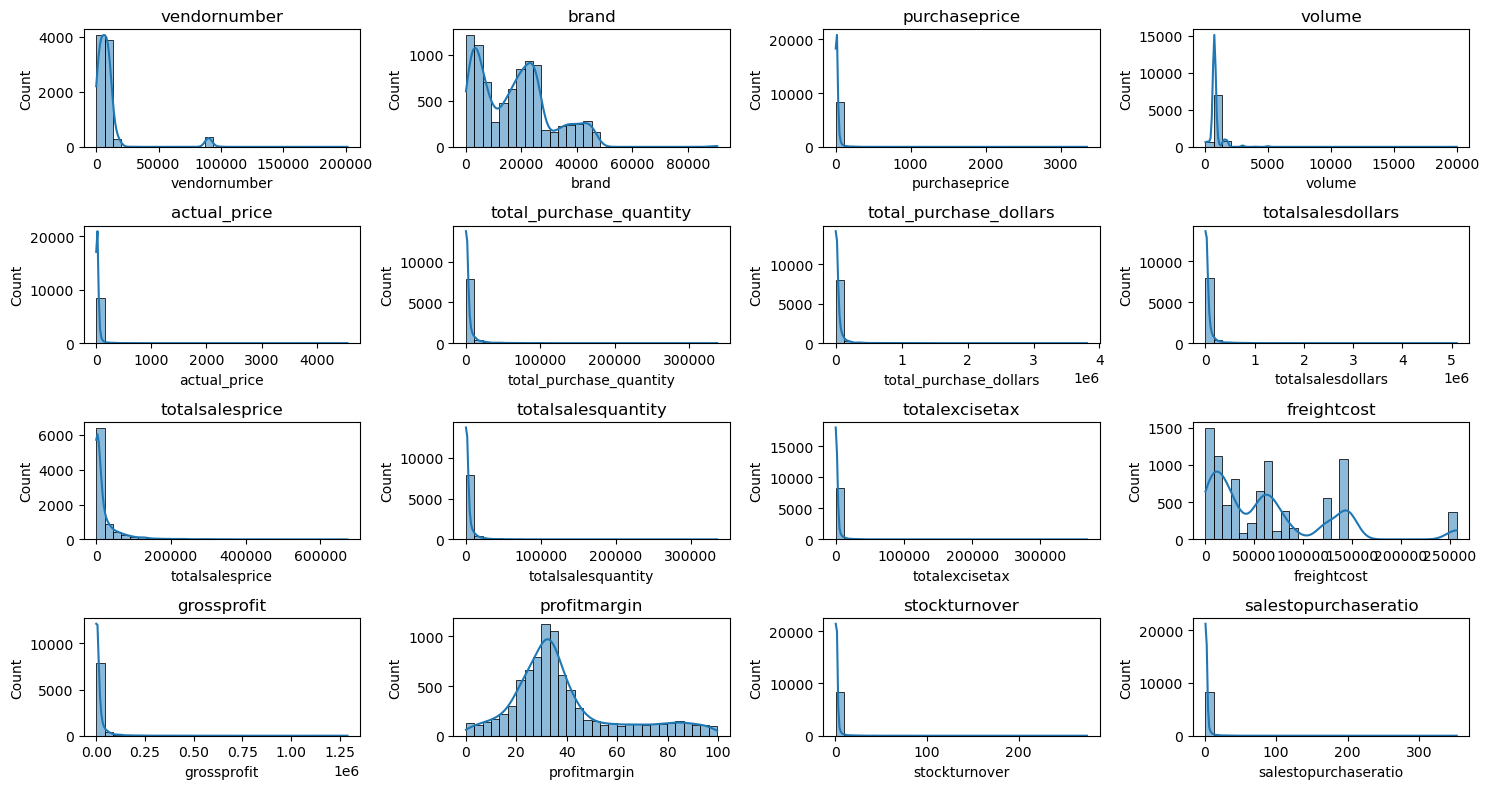

In [26]:
#distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,8))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

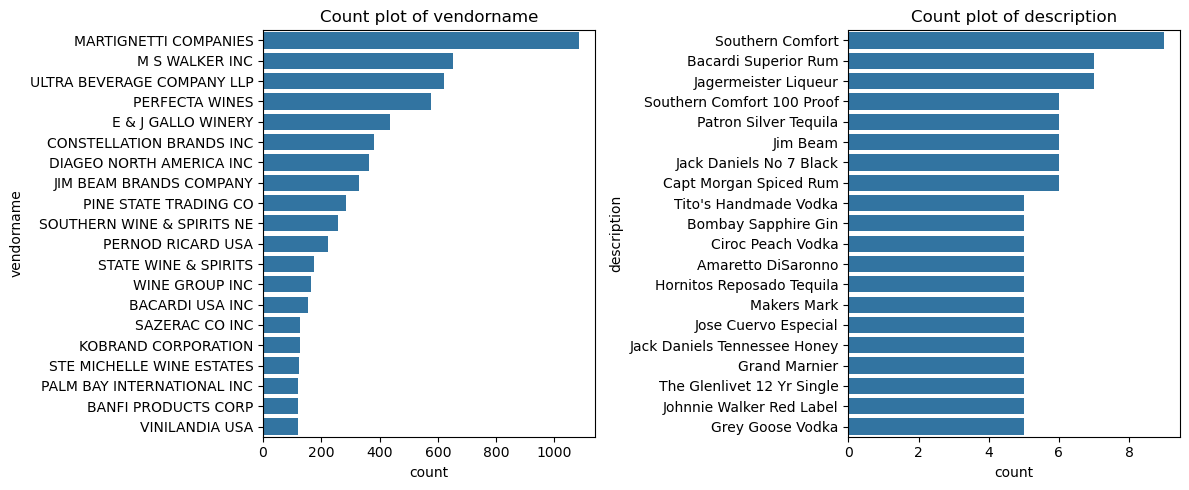

In [53]:
#count plots for categorical columns
#categorical_cols = ["vendorname", "description"]
categorical_cols = df.select_dtypes(include=object).columns

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:20])
    plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.show()

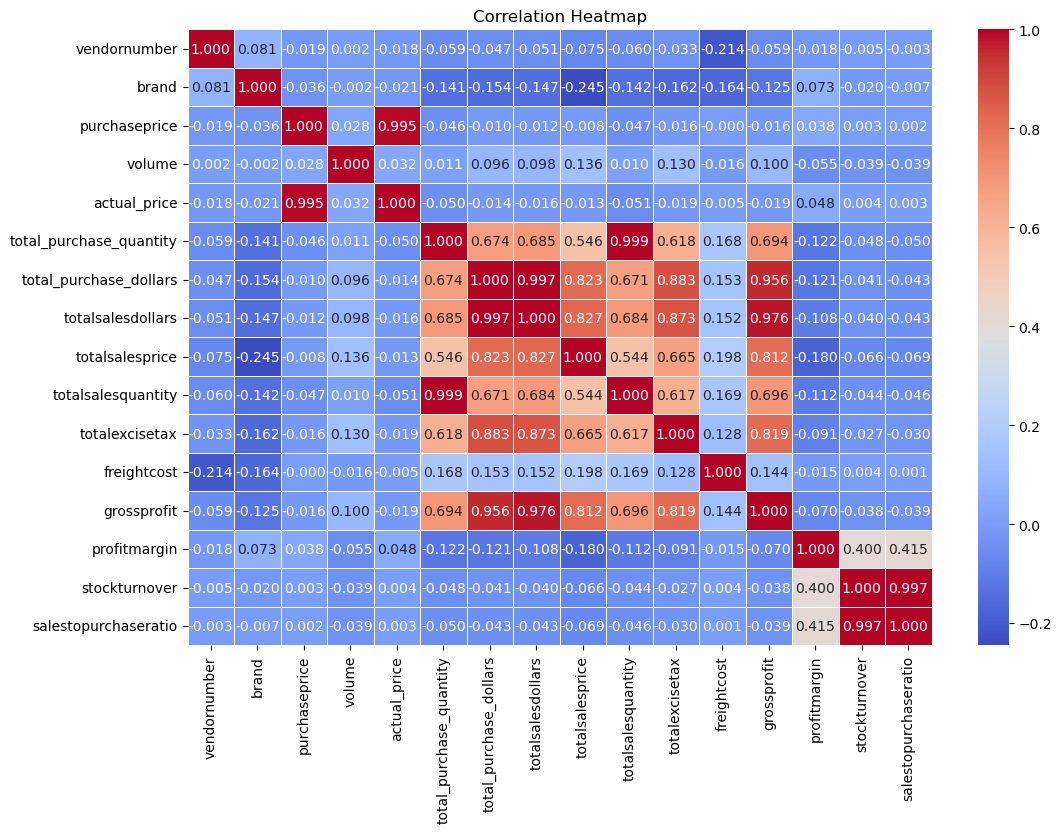

In [70]:
#correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap="coolwarm", linewidth=0.5)
plt.title("Correlation Heatmap")
plt.show()


## Correlation Insights

Here are some key insights derived from the correlation analysis:

* **Purchase Price's Limited Impact:** **PurchasePrice** shows only a **weak negative correlation** with **TotalSalesDollars** (-0.012) and **GrossProfit** (-0.016). This suggests that fluctuations in the purchase price of items do not significantly influence the overall sales revenue or the gross profit generated.

* **Efficient Inventory Turnover:** A **very strong positive correlation** exists between **total purchase quantity** and **total sales quantity** (0.999). This near-perfect correlation strongly indicates highly efficient inventory management and turnover, meaning almost everything purchased is subsequently sold.

* **Profit Margin and Sales Price Relationship:** There's a **negative correlation** between **ProfitMargin** and **TotalSalesPrice** (-0.179). This implies that as the total sales price increases, the profit margin tends to decrease. This could be a result of competitive pricing strategies, where higher sales volumes are achieved at the cost of narrower margins, or potentially due to selling larger volumes of lower-margin products.

* **Stock Turnover vs. Profitability:** **StockTurnover** exhibits **weak negative correlations** with both **GrossProfit** (-0.038) and **ProfitMargin** (-0.055). This suggests that merely moving inventory faster doesn't automatically translate into higher gross profit or better profit margins. Other factors, such as pricing strategy, cost management, or the type of products being turned over, likely play a more significant role in determining profitability.

---
# Data Analysis and Solve Research Questions
---

### Identify Brands that needs promotionals or pricing adjustments which exhibit lower sales performance but higher profit margins

In [86]:
brand_performance = df.groupby('description').agg({
    'totalsalesdollars': 'sum',
    'profitmargin': 'mean'
}).reset_index()
brand_performance.sort_values('profitmargin')

description  totalsalesdollars  profitmargin
5485        Pepperjack Barossa Red             191.92      0.020842
2954  Flint & Steel Svgn Bl Napa V             119.92      0.033356
2179             Croft Tawny Porto             191.84      0.041701
2561          Douglass Hill Merlot             143.76      0.083472
5385   Parducci 13 True Grit Chard           24927.81      0.121190
...                            ...                ...           ...
4568             M Chiarlo Gavi Wh            1208.90     99.393664
657        Beniotome Sesame Shochu            4768.41     99.534226
6449    Skinnygirl Tangerine Vodka            2368.42     99.544844
2411            DiSaronno Amaretto            4781.16     99.553246
5528  Pezzi King Svgn Bl Dry Creek            2221.29     99.604734

[7707 rows x 3 columns]